<a href="https://colab.research.google.com/github/shlomi1993/deep-learning-notebooks/blob/main/1_basic_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Chapter 1 - Basic Classifiers

## Introduction

Digit classification has practical applications in areas such as postal code recognition, bank check processing, and document automation. In this notebook, our goal is to apply computational learning techniques to recognize handwritten digits using the MNIST dataset. This dataset contains 28x28 grayscale images of handwritten digits (0-9), commonly used to benchmark machine learning models.

## Global Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap display

from typing import Tuple, List
from tqdm.notebook import tqdm

## Dataset and Preprocessing

#### Fetch MNIST dataset

The MNIST dataset serves as a cornerstone in the domain of digit classification. It comprises a collection of 28x28 pixel grayscale images, each depicting a handwritten
digit (0 through 9). Originating from the National Institute of Standards and Technology (NIST), the MNIST dataset has become a benchmark for assessing the efficacy of various machine learning algorithms

Key Characteristics of MNIST:
- Image Size: Each image is 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels per image.
- Grayscale Images: The images are grayscale, with each pixel represented by a single intensity value ranging from 0 (black) to 255 (white).
- Handwritten Digits: The dataset primarily consists of handwritten digits, introducing variations in writing styles, slants, and sizes.
- Labeling: Each image is associated with a label (digit from 0 to 9), creating a tenclass classification problem.

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

Explore objects (images)

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Explore labels

In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


Convert dataset types

In [ ]:
X = X.to_numpy()                # Convert images to NumPy arrays
y = y.astype(int).to_numpy()    # Convert images to NumPy array containing int-type labels

Explore the dataset

In [ ]:
type_name = lambda x: "'" + type(x).__name__ + "'"

In [ ]:
print(f"X is of type {type_name(X)}")
print(f"Elements of X are of type {type_name(X[0])}, containing values of type {type_name(X[0, 0])}")
print()
print(f"y is of type {type_name(y)}")
print(f"Elements of y are of type {type_name(y[0])}")

X is of type 'ndarray'
Elements of X are of type 'ndarray', containing values of type 'int64'

y is of type 'ndarray'
Elements of y are of type 'int64'


In [ ]:
print(f"Example for X image:\n{X[0]}")
print()
print(f"Example for y label: {y[0]}")

Example for X image:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 2

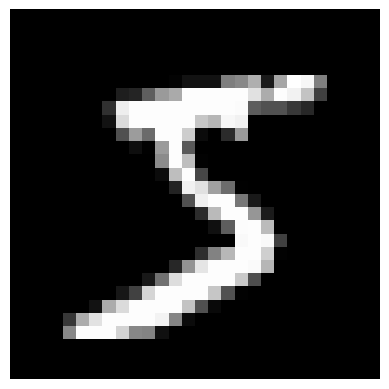

In [ ]:
image = X[0].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

#### Normalize images

In [ ]:
# Make all values between 0 and 1 (inclusive) to improve model accuracy
X = X / 255.

#### Flatten images

Flatten the input images to create a vector representation. Transform each original image from 28x28 pixels into a vector of size 784x1.

In [ ]:
# It appears that the provided image are already flatten
X[0].shape

(784,)

In [ ]:
# The following line ensures that the images are flattened, in case they weren't already
X = np.vstack(X)

pd.DataFrame(X)  # Just for display

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Add leading 1 biases

Insert a leading 1 as bias for each 784x1 flattened imaged vector, making it 785x1 vector.

In [ ]:
# Add bias column with value 1.0 for each sample
bias_column = np.ones((X.shape[0], 1))  # shape: (num_samples, 1)
X = np.hstack((bias_column, X))

pd.DataFrame(X)  # Just for display

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Split the dataset into training and test sets

Divide the original MNIST dataset into two subsets:
1. A training set containing 60,000 images
2. A test set containing 10,000 images.

Employ the `train_test_split` function from
the scikit-learn module for this purpose.

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 1 / 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

Check how many occurrences there are for each label

In [ ]:
pd.Series(y).value_counts().sort_index()  # Just for display

,count
0,6903
1,7877
2,6990
3,7141
4,6824
5,6313
6,6876
7,7293
8,6825
9,6958


Verify train-test split ratio

In [ ]:
print(f"Train image count: {len(X_train)}\tTrain label count: {len(y_train)}")
print(f"Test image count:  {len(X_test)}\tTest label count:  {len(y_test)}")

Train image count: 60000	Train label count: 60000
Test image count:  10000	Test label count:  10000


Look at a training example

In [ ]:
print(f"Example for X_train image:\n{X_train[0]}\n")
print(f"Example for y_train image: {y_train[0]}")

Example for X_train image:
[1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

Look at a test example

In [ ]:
print(f"Example for X_test label: {X_test[0]}\n")
print(f"Example for y_test label: {y_test[0]}")

Example for X_test label: [1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.     

#### One-hot encode train labels

For computational convenience, transform the
digit labels into one-hot vectors. Each label, such as '5', will be represented as [0,0,0,0,0,1,0,0,0,0], and '0' will correspond to [1,0,0,0,0,0,0,0,0,0].

In [ ]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Backup label for verification
backup_label = y_train[0].item()

# Determine the number of unique classes
n_classes = len(np.unique(y))

# Perform one-hot encoding with vercotized operation
y_train = np.eye(n_classes)[y_train]
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

Verify `y_train` shape

In [ ]:
y_train.shape

(60000, 10)

Verify encoding correctness

In [ ]:
print(f"First training label before encoding: {backup_label}")
print(f"First training label after encoding: {y_train[0]}")

First training label before encoding: 2
First training label after encoding: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


#### Type summary

In [ ]:
print(f"X_train is of type {type_name(X_train)}")
print(f"Elements of X_train are of type {type_name(X_train[0])}, containing values of type {type_name(X_train[0, 0])}")
print(f"y_train is of type {type_name(y_train)}")
print(f"Elements of y_train are of type {type_name(y_train[0])} (one-hot encoded)")
print(f"Elements of y_train example are of type {type_name(y_train[0, 0])}")
print()
print(f"X_test is of type {type_name(X_test)}")
print(f"Elements of X_test are of type {type(X_test[0])}, containing values of type {type_name(X_test[0, 0])}")
print(f"y_test is of type {type_name(y_test)}")
print(f"Elements of y_test are of type {type_name(y_test[0])} (no reason for one-hot encoding)")

X_train is of type 'ndarray'
Elements of X_train are of type 'ndarray', containing values of type 'float64'
y_train is of type 'ndarray'
Elements of y_train are of type 'ndarray' (one-hot encoded)
Elements of y_train example are of type 'float64'

X_test is of type 'ndarray'
Elements of X_test are of type <class 'numpy.ndarray'>, containing values of type 'float64'
y_test is of type 'ndarray'
Elements of y_test are of type 'int64' (no reason for one-hot encoding)


## Evaluation Metrics

Implement some model evaluation metrics assuming that it is forbidden to use:
```
from sklearn.metrics import confusion_matrix, accuracy_score
```

#### Accuracy Score

In [ ]:
def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Computes the accuracy of the classification.

    Args:
        y_true (np.ndarray): Array of true labels.
        y_pred (np.ndarray): Array of predicted labels.

    Returns:
        float: The accuracy score.
    """
    return np.sum(y_true == y_pred) / len(y_true)  # Same as (TP + TN) / (TP + TN + FP + FN)

#### Confunction Matrix

In [ ]:
def confusion_matrix(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """
    Computes the confusion matrix for a multi-classification.

    Args:
        y_true (np.ndarray): Array of true labels.
        y_pred (np.ndarray): Array of predicted labels.

    Returns:
        np.ndarray: The confusion matrix.
    """
    n_classes = len(np.unique(y_true))
    matrix = np.zeros((n_classes, n_classes), dtype=int)

    np.add.at(matrix, (y_true, y_pred), 1)
    # The line above do the follows more efficiently:
    # for true, pred in zip(y_true, y_pred):
    #     matrix[true, pred] += 1

    return matrix

#### TPR and TNR

In [ ]:
def calculate_tpr_tnr(conf_matrix: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes the True Positive Rate (TPR) and True Negative Rate (TNR) for each class based on a pre-calculated
    confusion matrix.

    Args:
        conf_matrix (np.ndarray): A pre-calculated confusion matrix used to calculate TPR and TNR.

    Returns:
        Tuple[np.ndarray, np.ndarray]: Two arrays containing the TPR and TNR for each class.
    """
    tp = np.diag(conf_matrix)
    tpr = tp / np.sum(conf_matrix, axis=1)  # TPR for each class. Same as TP / (TP + FN) for each class.
    tnr = tp / np.sum(conf_matrix, axis=0)  # TNR for each class. Same as TN / (TN + FP) for each class.
    return tpr, tnr

#### Summarized Confusion Matrix

In [ ]:
def summarize_confusion_matrix(conf_matrix: np.ndarray) -> pd.DataFrame:
    """
    Compute True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN) for each class in a
    multi-class confusion matrix.

    Args:
        conf_matrix (np.ndarray): A pre-calculated confusion matrix to simplify.

    Returns:
        pd.DataFrame: A DataFrame containing TP, TN, FP, and FN for all classifications.
    """
    tp = np.diag(conf_matrix)  # True Positives
    fn = np.sum(conf_matrix, axis=1) - tp  # False Negatives
    fp = np.sum(conf_matrix, axis=0) - tp  # False Positives
    tn = np.sum(conf_matrix) - (tp + fn + fp)  # True Negatives

    return pd.DataFrame({
        "Actual Positive": ["TP: " + str(np.sum(tp)), "FN: " + str(np.sum(fn))],
        "Actual Negative": ["FP: " + str(np.sum(fp)), "TN: " + str(np.sum(tn))]
    }, index=["Predicted Positive", "Predicted Negative"])

## Part A: Perceptron Learning Algorithm

In this part, we extend the Perceptron Learning Algorithm (PLA) for binary classification to multi-class classification. We'll do so by employing the one-vs-all strategy, which involves training multiple binary PLA classifiers. Each classifier is dedicated to distinguishing one class from the rest. In this approach, the multi-class problem is reduced to K binary problems, where K is the number of classes.

In cases where the data is not linearly separable, the Perceptron Learning Algorithm (PLA) may fail to converge and exhibit instability. To address this, the pocket algorithm is introduced. This modification keeps track of the best weight vector encountered during the iterations, storing it "in its pocket." At the end of the process, the weight vector with the best performance is selected as the final solution. The pocket algorithm improves the stability and reliability of PLA by ensuring that the most effective weight vector is retained.

#### Define a Perceptron with Pocket Algorithm

In [ ]:
class Perceptron:
    """
    A binary Perceptron classifier model.

    Attributes:
        n_epochs (int): The number of times the dataset is passed through. Commonly denoted in papers by T.
        weights (np.ndarray): The Perceptron's weight vector. Commonly denoted in papers by W.
        best_weights (np.ndarray): The weights that achieved the highest accuracy during training.
        best_accuracy (float): The highest accuracy achieved during training.
        accuracy_history (list): The accuracy history recorded per epoch.
    """
    def __init__(self, n_features: int, n_epochs: int = 100) -> None:
        """
        Initializes the Perceptron model.

        Args:
            n_features (int): Number of features in the input data.
            n_epochs (int, optional): The requested number of training epochs. Default is 100.
        """
        self.n_epochs = n_epochs
        self.weights = np.zeros(n_features, dtype=np.float64)  # Allocates a zeros. Tried small random values, but got lower accuracy.
        self.best_weights = self.weights.copy()
        self.best_accuracy = 0
        self.accuracy_history = []

    def predict(self, examples: np.ndarray) -> np.ndarray:
        """
        Predicts labels for the provided examples (images) by calculating sign(w^T ⋅ x) where w is the weight vector and
        x is the given examples (images).

        Args:
            examples (np.ndarray): A NumPy array where each row represents an example (flattened image) to classify.
                Commonly denoted in papers by X, X_train or X_test.

        Returns:
            np.ndarray: A 1D array containing the predicted label for each example.
                Commonly denoted in papers by y_hat.
        """
        return np.sign(self.weights.T @ examples)

    def fit(self, training_examples: np.ndarray, training_labels: np.ndarray) -> None:
        """
        Trains the model using the provided training data.

        Args:
            training_examples (np.ndarray): A NumPy array where each row represents an example (image).
                Commonly denoted in papers by X_train.
            training_labels (np.ndarray): A 1D array containing the corresponding labels (+1 or -1).
                Commonly denoted in papers by y_train.
        """
        # Fit the weights to the training set for 'n_epochs' times
        for epoch in tqdm(range(self.n_epochs), desc="Epochs"):

            # Make predictions - i.e., calculate sign(w^T ⋅ x)
            predictions = self.predict(training_examples.T)

            # Count misclassified examples
            misclassified = predictions != training_labels

            # Stop early if there are no misclassified examples
            if not misclassified.any():
                break

            # Update weights using the Perceptron rule for all misclassified examples (using vectorized update)
            self.weights += np.dot(misclassified * training_labels, training_examples)

            # Calculate epoch accuracy and record it
            accuracy = accuracy_score(training_labels, predictions)
            self.accuracy_history.append(accuracy)

            # Update the best accuracy and weights if the current epoch's accuracy is better
            if accuracy > self.best_accuracy:
                self.best_accuracy = accuracy
                self.best_weights = self.weights.copy()

- **Weight Initialization Determination:** Small random values and a zero matrix were tested for weight initialization across multiple random seeds. The zero matrix frequently yielded slightly better accuracy compared to random initialization.

#### Define training function

Train a Perceptron instance for each digit from 0 to 9

In [ ]:
def train_perceptrons(training_examples: np.ndarray, training_labels: np.ndarray,
                      n_classes: int, n_epochs: int) -> List[Perceptron]:
    """
    Trains a set of Perceptron classifiers for each class in a multi-class classification problem.

    For each class (digit), a separate binary Perceptron is trained where the target is 1 for the current class
    and -1 for all other classes. This is used to handle multi-class classification via the one-vs-rest strategy.

    Args:
        training_examples (np.ndarray): The input features for training the Perceptrons.
        training_labels (np.ndarray): The labels for each training example.
        n_classes (int): The number of classes (i.e., digits) for which to train separate Perceptrons.
        n_epochs (int): The number of epochs for training each Perceptron.

    Returns:
        List[Perceptron]: A list of trained Perceptron classifiers, one for each class.
    """
    classifiers = []
    for digit in tqdm(range(n_classes), desc="Digits"):
        y_binary = np.where(np.argmax(y_train, axis=1) == digit, 1, -1)
        perceptron = Perceptron(n_features=training_examples.shape[1], n_epochs=n_epochs)
        perceptron.fit(X_train, y_binary)
        classifiers.append(perceptron)
    return classifiers

Define epoch-accuracy plot function

In [ ]:
def plot_pla_epoch_accuracy_graph(classifiers: List[Perceptron]) -> None:
    """
    Plots the accuracy of a set of Perceptron classifiers over epochs.

    Args:
        classifiers (List[Perceptron]): A list of trained Perceptron classifiers.
    """
    plt.figure(figsize=(10, 5))
    for i, perceptron in enumerate(classifiers):
        plt.plot(perceptron.accuracy_history, label=f"Class {i}")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.title("Perceptron Training Accuracy per Class")
    plt.legend()
    plt.grid()
    plt.show()

#### Hyperparameter Calibration

To select a good number of training epochs, the model is trained for 200 epochs (as part of a research), and the accuracy is plotted against the number of epochs. By analyzing the graph, the point at which the accuracy stabilizes indicates that further training beyond this point would yield diminishing improvements. The epoch corresponding to this stabilization point is selected as the optimal number of epochs for training the model.

Digits:   0%|          | 0/10 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

Epochs:   0%|          | 0/200 [00:00<?, ?it/s]

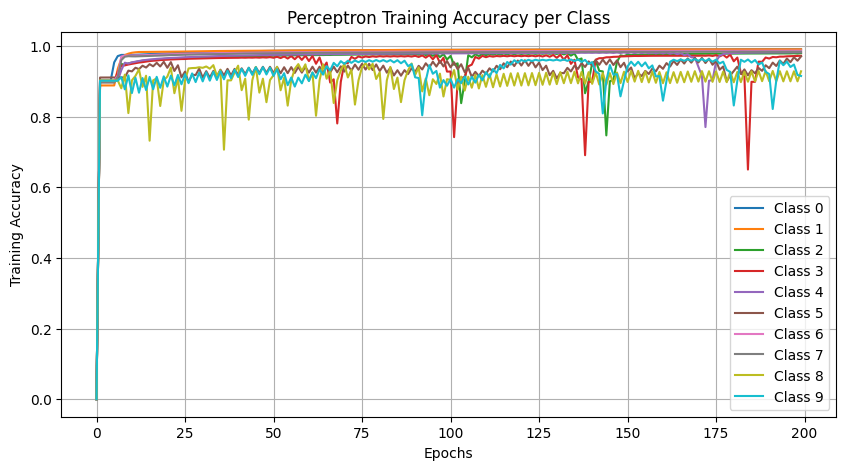

In [ ]:
# ##### Draft Block #####

# classifiers = train_perceptrons(X_train, y_train, n_classes, n_epochs=200)
# plot_pla_epoch_accuracy_graph(classifiers)

Upon examining the graph, it is evident that the accuracy shows little improvement after the 50th epoch, and for some classes, it even worsens. Therefore, we select the number of epochs to be 50.

#### Train model - by using one-vs-all strategy

Train a Perceptron instance for each digit from 0 to 9

In [ ]:
classifiers = train_perceptrons(X_train, y_train, n_classes, n_epochs=50)

Digits:   0%|          | 0/10 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Epochs:   0%|          | 0/50 [00:00<?, ?it/s]

At this point, we have collected 10 weight vectors, each dedicated to distinguishing one class from all the others.

Plot the accuracy per epoch

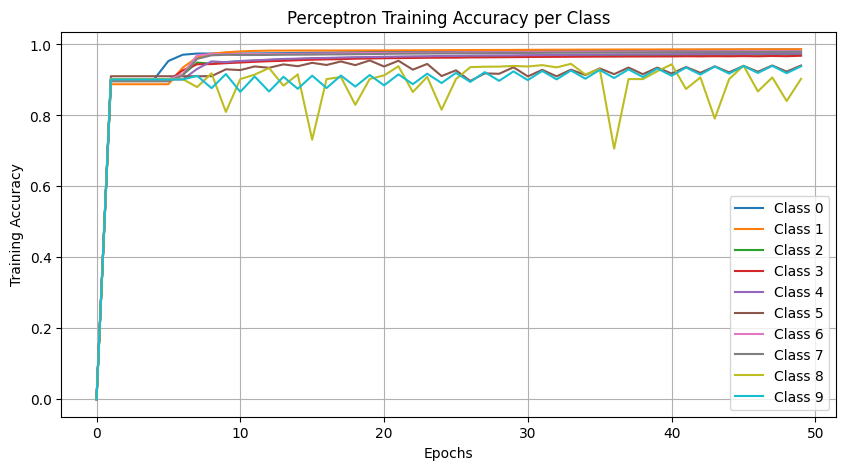

In [ ]:
plot_pla_epoch_accuracy_graph(classifiers)

#### Predict based on the highest score

In [ ]:
scores = np.array([perceptron.predict(X_test.T) for perceptron in classifiers])
y_pred = np.argmax(scores, axis=0)
y_pred

array([8, 4, 5, ..., 3, 0, 3])

#### Evaluate performance

Calculate accuracy, confusion matrix, TPR and TNR

In [ ]:
perceptron_accuracy = accuracy_score(y_test, y_pred)
perceptron_conf_matrix = confusion_matrix(y_test, y_pred)
perceptron_tpr, perceptron_tnr = calculate_tpr_tnr(perceptron_conf_matrix)

Print accuracy

In [ ]:
print(f"Accuracy: {(perceptron_accuracy * 100):.2f}%")

Accuracy: 83.52%


Display confusion matrix as a heatmap

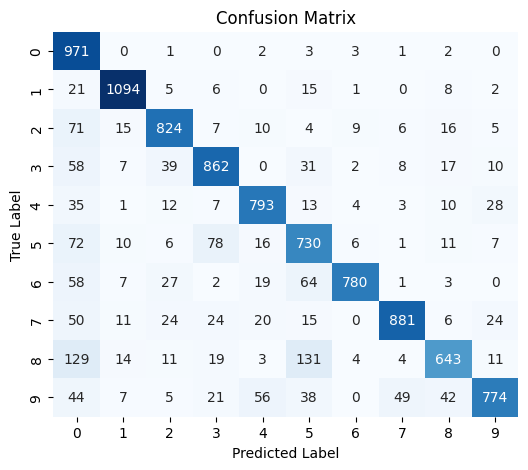

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    data=perceptron_conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Display TPR and TNR

In [ ]:
pd.DataFrame({
    "True-Positive Rate (TPR)": [f"{(rate * 100):.2f}%" for rate in perceptron_tpr],
    "True-Negative Rate (TNR)": [f"{(rate * 100):.2f}%" for rate in perceptron_tnr]
})

,True-Positive Rate (TPR),True-Negative Rate (TNR)
0,98.78%,64.35%
1,94.97%,93.83%
2,85.21%,86.37%
3,83.37%,84.02%
4,87.53%,86.29%
5,77.91%,69.92%
6,81.17%,96.42%
7,83.51%,92.35%
8,66.36%,84.83%
9,74.71%,89.90%


Display summarized confusion matrix as a heatmap

In [ ]:
perceptron_summarized_conf_matrix = summarize_confusion_matrix(perceptron_conf_matrix)
perceptron_summarized_conf_matrix

,Actual Positive,Actual Negative
Predicted Positive,TP: 8352,FP: 1648
Predicted Negative,FN: 1648,TN: 88352


## Part B: Softmax Regression

In this part, we'll implement a Softmax Regression classifier to classify handwritten digits from the MNIST dataset. Softmax Regression generalizes logistic regression for multi-class classification by estimating the probability of each class using the softmax function.

#### Define Softmax Regression classifier model

In [ ]:
class SoftmaxRegressionClassifier:
    """
    Softmax Regression model that uses gradient descent for multi-class classification.
    """
    def __init__(self, n_features: int, n_classes: int, n_epochs: int = 100, lr: float = 0.01) -> None:
        """
        Initialize a Softmax Regression model.

        Args:
            n_features (int): Number of features in the input data.
            n_classes (int): Number of classes in the classification task.
            n_epochs (int, optional): Number of training iterations. Defaults to 100.
            lr (float, optional): Learning rate for gradient descent. Commonly denoted in papers by Greek letter eta.
                Defaults to 0.01.
        """
        self.lr = lr
        self.epochs = n_epochs
        self.weights = np.zeros((n_classes, n_features))  # Allocates a zeros. Tried small random values, but got lower accuracy.
        self.losses = list()

    def _softmax(self, logits: np.ndarray) -> np.ndarray:
        """
        Compute a vector of SoftMax probabilities for a given set of logits.

        Args:
            logits (np.ndarray): Array of weighted sums (w^T ⋅ x) before applying SoftMax.

        Returns:
            np.ndarray: A vector of SoftMax probability for each class.
        """
        exponents = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exponents / np.sum(exponents, axis=1, keepdims=True)

    def _compute_loss(self, training_labels: np.ndarray, predictions: np.ndarray) -> np.float64:
        """
        Compute the cross-entropy loss between true labels and predicted probabilities.

        Args:
            training_labels (np.ndarray): One-hot encoded true labels.
            predictions (np.ndarray): Predicted probabilities for each class.

        Returns:
            np.float64: The cross-entropy loss value.
        """
        return -np.sum(np.sum(training_labels * np.log(predictions + 1e-10), axis=1))  # Cross-entropy loss

    def _update_weights(self, training_examples: np.ndarray, training_labels: np.ndarray, predictions: np.ndarray) -> None:
        """
        Update the model weights using Gradient-Descent.
        Compute the gradient with respect to the model weights, and update the weights.

        Args:
            training_examples (np.ndarray): Input training examples (images).
            training_labels (np.ndarray): One-hot encoded true label for each example.
            predictions (np.ndarray): Predicted probabilities for each example.
        """
        n_samples = training_examples.shape[0]
        error = predictions - training_labels
        gradient = np.dot(error.T, training_examples) / n_samples  # Gradient of cross-entropy (removed minus sign)
        self.weights -= self.lr * gradient

    def predict(self, examples: np.ndarray) -> np.ndarray:
        """
        Predict class labels for given input examples.

        Args:
            examples (np.ndarray): Input examples to classify (shape: [n_samples x n_features]).

        Returns:
            np.ndarray: Predicted label for each input example (shape: [n_samples]).
        """
        logits = np.dot(examples, self.weights.T)
        return np.argmax(self._softmax(logits), axis=1)

    def fit(self, training_examples: np.ndarray, training_labels: np.ndarray) -> None:
        """
        Train the Softmax Regression model using Gradient-Descent.

        Args:
            training_examples (np.ndarray): Training feature matrix of shape (num_samples, num_features).
            training_labels (np.ndarray): One-hot encoded training labels of shape (num_samples, num_classes).
        """
        self.losses.clear()
        for epoch in tqdm(range(1, self.epochs + 1), desc="Epochs"):
            logits = np.dot(training_examples, self.weights.T)
            predictions = self._softmax(logits)
            self._update_weights(training_examples, training_labels, predictions)
            loss = self._compute_loss(training_labels, predictions)
            self.losses.append(loss)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}:\tLoss = {loss:.4f}")

- **Weight Initialization Determination:** Weight initialization was determined similarly to PLA, but in this case, a weight matrix of zeros with shape (n_classes, n_features) was used instead of a vector.

#### Hyperparameter Calibration

A grid of 9 predefined hyperparameter combinations was tested to find the optimal learning rate and number of epochs. The Softmax Regression model was trained and evaluated based on test set accuracy. This calibration was done during the research phase and does not need to be repeated in future runs. The best-performing values, that doesn't lead to overfitting, can be reused for consistency and efficiency.

In [ ]:
# ##### Draft Block #####

# HYPER_PARAMETER_TEST_LIST = [
#     (100, 0.1),   # Decent training time, moderate learning rate: Expected to balance convergence and stability
#     (100, 0.5),   # Higher learning rate may accelerate convergence: Expect faster training but may lose stability
#     (100, 1.0),   # Very high learning rate, might be unstable: Risk of overshooting and failing to converge

#     (250, 0.1),   # More epochs to allow low learning rate to converge: Should improve accuracy but may be slow
#     (250, 0.5),   # Higher learning rate may accelerate convergence: Expect stable convergence with high accuracy
#     (250, 1.0),   # Higher learning rate, may be risky even with many epochs: Faster convergence but risk of instability

#     (500, 0.1),   # Even more epochs with moderate learning rate: Very slow but should converge well
#     (500, 0.5),   # High learning rate and many epochs, may be optimal: Expected to converge faster while maintaining stability
#     (500, 1.0),   # Long training with aggressive learning, might overfit or oscillate: Likely to overfit or be unstable
# ]

# best_n_epochs = 0
# best_lr = 0
# best_accuracy = 0

# for n_epochs, lr in tqdm(HYPER_PARAMETER_TEST_LIST, desc="Hyperparameter Tuning"):

#     # Train
#     softmax_model = SoftmaxRegressionClassifier(X_train.shape[1], n_classes, n_epochs, lr)
#     softmax_model.fit(X_train, y_train)

#     # Predict
#     y_pred = softmax_model.predict(X_test)

#     # Evaluate
#     softmax_accuracy = accuracy_score(y_test, y_pred)

#     # Save best
#     if softmax_accuracy > best_accuracy:
#         best_n_epochs = n_epochs
#         best_lr = lr
#         best_accuracy = softmax_accuracy

# print(f"Best n_epochs: {best_n_epochs}")
# print(f"Best lr: {best_lr}")
# print(f"Best accuracy: {best_accuracy}")


Hyperparameter Tuning:   0%|          | 0/9 [00:00<?, ?it/s]

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10:	Loss = 95683.6571
Epoch 20:	Loss = 72444.0854
Epoch 30:	Loss = 60205.3738
Epoch 40:	Loss = 52821.4689
Epoch 50:	Loss = 47885.0436
Epoch 60:	Loss = 44337.3173
Epoch 70:	Loss = 41651.5998
Epoch 80:	Loss = 39538.4149
Epoch 90:	Loss = 37825.7482
Epoch 100:	Loss = 36404.9029


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10:	Loss = 48697.6431
Epoch 20:	Loss = 36519.2023
Epoch 30:	Loss = 31822.4663
Epoch 40:	Loss = 29198.7655
Epoch 50:	Loss = 27477.4620
Epoch 60:	Loss = 26239.5222
Epoch 70:	Loss = 25294.6657
Epoch 80:	Loss = 24542.8778
Epoch 90:	Loss = 23926.0638
Epoch 100:	Loss = 23407.9286


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 10:	Loss = 61400.9235
Epoch 20:	Loss = 36029.7522
Epoch 30:	Loss = 25931.0340
Epoch 40:	Loss = 24059.4729
Epoch 50:	Loss = 23078.7809
Epoch 60:	Loss = 22344.6853
Epoch 70:	Loss = 21764.4016
Epoch 80:	Loss = 21290.0352
Epoch 90:	Loss = 20892.4775
Epoch 100:	Loss = 20552.7971


Epochs:   0%|          | 0/250 [00:00<?, ?it/s]

Epoch 10:	Loss = 95683.6571
Epoch 20:	Loss = 72444.0854
Epoch 30:	Loss = 60205.3738
Epoch 40:	Loss = 52821.4689
Epoch 50:	Loss = 47885.0436
Epoch 60:	Loss = 44337.3173
Epoch 70:	Loss = 41651.5998
Epoch 80:	Loss = 39538.4149
Epoch 90:	Loss = 37825.7482
Epoch 100:	Loss = 36404.9029
Epoch 110:	Loss = 35203.7314
Epoch 120:	Loss = 34172.3927
Epoch 130:	Loss = 33275.2992
Epoch 140:	Loss = 32486.3273
Epoch 150:	Loss = 31785.8440
Epoch 160:	Loss = 31158.7924
Epoch 170:	Loss = 30593.4203
Epoch 180:	Loss = 30080.4123
Epoch 190:	Loss = 29612.2830
Epoch 200:	Loss = 29182.9442
Epoch 210:	Loss = 28787.3894
Epoch 220:	Loss = 28421.4614
Epoch 230:	Loss = 28081.6771
Epoch 240:	Loss = 27765.0945
Epoch 250:	Loss = 27469.2102


Epochs:   0%|          | 0/250 [00:00<?, ?it/s]

Epoch 10:	Loss = 48697.6431
Epoch 20:	Loss = 36519.2023
Epoch 30:	Loss = 31822.4663
Epoch 40:	Loss = 29198.7655
Epoch 50:	Loss = 27477.4620
Epoch 60:	Loss = 26239.5222
Epoch 70:	Loss = 25294.6657
Epoch 80:	Loss = 24542.8778
Epoch 90:	Loss = 23926.0638
Epoch 100:	Loss = 23407.9286
Epoch 110:	Loss = 22964.5009
Epoch 120:	Loss = 22579.2386
Epoch 130:	Loss = 22240.3142
Epoch 140:	Loss = 21939.0194
Epoch 150:	Loss = 21668.7820
Epoch 160:	Loss = 21424.5368
Epoch 170:	Loss = 21202.3086
Epoch 180:	Loss = 20998.9277
Epoch 190:	Loss = 20811.8317
Epoch 200:	Loss = 20638.9231
Epoch 210:	Loss = 20478.4662
Epoch 220:	Loss = 20329.0106
Epoch 230:	Loss = 20189.3331
Epoch 240:	Loss = 20058.3940
Epoch 250:	Loss = 19935.3033


Epochs:   0%|          | 0/250 [00:00<?, ?it/s]

Epoch 10:	Loss = 61400.9235
Epoch 20:	Loss = 36029.7522
Epoch 30:	Loss = 25931.0340
Epoch 40:	Loss = 24059.4729
Epoch 50:	Loss = 23078.7809
Epoch 60:	Loss = 22344.6853
Epoch 70:	Loss = 21764.4016
Epoch 80:	Loss = 21290.0352
Epoch 90:	Loss = 20892.4775
Epoch 100:	Loss = 20552.7971
Epoch 110:	Loss = 20258.0498
Epoch 120:	Loss = 19999.0325
Epoch 130:	Loss = 19768.9928
Epoch 140:	Loss = 19562.8459
Epoch 150:	Loss = 19376.6780
Epoch 160:	Loss = 19207.4200
Epoch 170:	Loss = 19052.6257
Epoch 180:	Loss = 18910.3182
Epoch 190:	Loss = 18778.8792
Epoch 200:	Loss = 18656.9700
Epoch 210:	Loss = 18543.4717
Epoch 220:	Loss = 18437.4412
Epoch 230:	Loss = 18338.0768
Epoch 240:	Loss = 18244.6926
Epoch 250:	Loss = 18156.6973


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 10:	Loss = 95683.6571
Epoch 20:	Loss = 72444.0854
Epoch 30:	Loss = 60205.3738
Epoch 40:	Loss = 52821.4689
Epoch 50:	Loss = 47885.0436
Epoch 60:	Loss = 44337.3173
Epoch 70:	Loss = 41651.5998
Epoch 80:	Loss = 39538.4149
Epoch 90:	Loss = 37825.7482
Epoch 100:	Loss = 36404.9029
Epoch 110:	Loss = 35203.7314
Epoch 120:	Loss = 34172.3927
Epoch 130:	Loss = 33275.2992
Epoch 140:	Loss = 32486.3273
Epoch 150:	Loss = 31785.8440
Epoch 160:	Loss = 31158.7924
Epoch 170:	Loss = 30593.4203
Epoch 180:	Loss = 30080.4123
Epoch 190:	Loss = 29612.2830
Epoch 200:	Loss = 29182.9442
Epoch 210:	Loss = 28787.3894
Epoch 220:	Loss = 28421.4614
Epoch 230:	Loss = 28081.6771
Epoch 240:	Loss = 27765.0945
Epoch 250:	Loss = 27469.2102
Epoch 260:	Loss = 27191.8794
Epoch 270:	Loss = 26931.2530
Epoch 280:	Loss = 26685.7278
Epoch 290:	Loss = 26453.9058
Epoch 300:	Loss = 26234.5625
Epoch 310:	Loss = 26026.6200
Epoch 320:	Loss = 25829.1253
Epoch 330:	Loss = 25641.2325
Epoch 340:	Loss = 25462.1882
Epoch 350:	Loss = 25291

Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 10:	Loss = 48697.6431
Epoch 20:	Loss = 36519.2023
Epoch 30:	Loss = 31822.4663
Epoch 40:	Loss = 29198.7655
Epoch 50:	Loss = 27477.4620
Epoch 60:	Loss = 26239.5222
Epoch 70:	Loss = 25294.6657
Epoch 80:	Loss = 24542.8778
Epoch 90:	Loss = 23926.0638
Epoch 100:	Loss = 23407.9286
Epoch 110:	Loss = 22964.5009
Epoch 120:	Loss = 22579.2386
Epoch 130:	Loss = 22240.3142
Epoch 140:	Loss = 21939.0194
Epoch 150:	Loss = 21668.7820
Epoch 160:	Loss = 21424.5368
Epoch 170:	Loss = 21202.3086
Epoch 180:	Loss = 20998.9277
Epoch 190:	Loss = 20811.8317
Epoch 200:	Loss = 20638.9231
Epoch 210:	Loss = 20478.4662
Epoch 220:	Loss = 20329.0106
Epoch 230:	Loss = 20189.3331
Epoch 240:	Loss = 20058.3940
Epoch 250:	Loss = 19935.3033
Epoch 260:	Loss = 19819.2933
Epoch 270:	Loss = 19709.6985
Epoch 280:	Loss = 19605.9382
Epoch 290:	Loss = 19507.5031
Epoch 300:	Loss = 19413.9445
Epoch 310:	Loss = 19324.8652
Epoch 320:	Loss = 19239.9122
Epoch 330:	Loss = 19158.7703
Epoch 340:	Loss = 19081.1574
Epoch 350:	Loss = 19006

Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Epoch 10:	Loss = 61400.9235
Epoch 20:	Loss = 36029.7522
Epoch 30:	Loss = 25931.0340
Epoch 40:	Loss = 24059.4729
Epoch 50:	Loss = 23078.7809
Epoch 60:	Loss = 22344.6853
Epoch 70:	Loss = 21764.4016
Epoch 80:	Loss = 21290.0352
Epoch 90:	Loss = 20892.4775
Epoch 100:	Loss = 20552.7971
Epoch 110:	Loss = 20258.0498
Epoch 120:	Loss = 19999.0325
Epoch 130:	Loss = 19768.9928
Epoch 140:	Loss = 19562.8459
Epoch 150:	Loss = 19376.6780
Epoch 160:	Loss = 19207.4200
Epoch 170:	Loss = 19052.6257
Epoch 180:	Loss = 18910.3182
Epoch 190:	Loss = 18778.8792
Epoch 200:	Loss = 18656.9700
Epoch 210:	Loss = 18543.4717
Epoch 220:	Loss = 18437.4412
Epoch 230:	Loss = 18338.0768
Epoch 240:	Loss = 18244.6926
Epoch 250:	Loss = 18156.6973
Epoch 260:	Loss = 18073.5784
Epoch 270:	Loss = 17994.8892
Epoch 280:	Loss = 17920.2382
Epoch 290:	Loss = 17849.2808
Epoch 300:	Loss = 17781.7123
Epoch 310:	Loss = 17717.2619
Epoch 320:	Loss = 17655.6887
Epoch 330:	Loss = 17596.7767
Epoch 340:	Loss = 17540.3322
Epoch 350:	Loss = 17486

After evaluating the hyperparameter pairs, the configuration of 250 epochs with a learning rate of 0.5 was chosen for its strong balance between loss reduction and stability, without raising overfitting concerns.

**Key observations:**

100 epochs, learning rate = 1.0 resulted in a loss of 20552.80 – a reasonable baseline, but not optimal.

250 epochs, learning rate = 0.5 yielded a loss of 19935.30 – selected for its consistent performance and stable convergence.

250 epochs, learning rate = 1.0 achieved a lower loss of 18156.70, but posed a higher risk of instability during training.

500 epochs, learning rate = 0.5 or 1.0 showed even lower losses (18168.69 and 16868.89, respectively), but with much higher risk of overfitting.

**Conclusion:** While 500 epochs lead to slightly better accuracy (91% compared to 90%) and lower loss, compared to 250 epochs, they carry a much higher risk of overfitting. The selected configuration - 250 epochs with a learning rate of 0.5 - offers good performance with reduced risk, making it a reliable choice.

**Note:** For more robust hyperparameter selection in future work, one could incorporate techniques like splitting the training data into separate training and validation sets and use K-fold cross-validation, enabling better evaluation and generalization performance.

#### Train model

In [ ]:
softmax_regression_model = SoftmaxRegressionClassifier(X_train.shape[1], n_classes, lr=0.5, n_epochs=250)
softmax_regression_model.fit(X_train, y_train)

Epochs:   0%|          | 0/250 [00:00<?, ?it/s]

Epoch 10:	Loss = 48697.6431
Epoch 20:	Loss = 36519.2023
Epoch 30:	Loss = 31822.4663
Epoch 40:	Loss = 29198.7655
Epoch 50:	Loss = 27477.4620
Epoch 60:	Loss = 26239.5222
Epoch 70:	Loss = 25294.6657
Epoch 80:	Loss = 24542.8778
Epoch 90:	Loss = 23926.0638
Epoch 100:	Loss = 23407.9286
Epoch 110:	Loss = 22964.5009
Epoch 120:	Loss = 22579.2386
Epoch 130:	Loss = 22240.3142
Epoch 140:	Loss = 21939.0194
Epoch 150:	Loss = 21668.7820
Epoch 160:	Loss = 21424.5368
Epoch 170:	Loss = 21202.3086
Epoch 180:	Loss = 20998.9277
Epoch 190:	Loss = 20811.8317
Epoch 200:	Loss = 20638.9231
Epoch 210:	Loss = 20478.4662
Epoch 220:	Loss = 20329.0106
Epoch 230:	Loss = 20189.3331
Epoch 240:	Loss = 20058.3940
Epoch 250:	Loss = 19935.3033


#### Plot loss curve

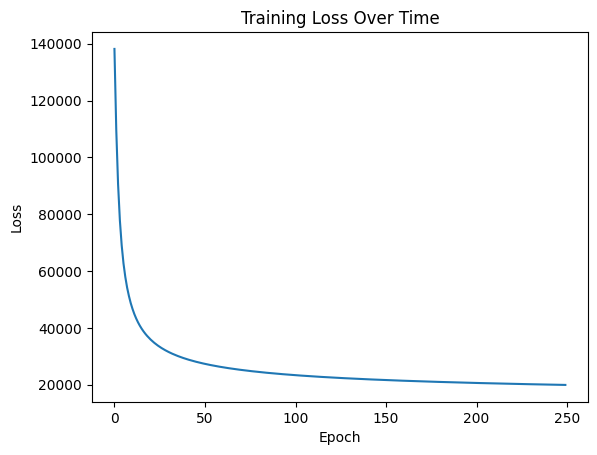

In [ ]:
plt.plot(softmax_regression_model.losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

#### Test model

In [ ]:
y_pred = softmax_regression_model.predict(X_test)

#### Evaluate performance

Calculate accuracy, confusion matrix, TPR and TNR

In [ ]:
softmax_reg_accuracy = accuracy_score(y_test, y_pred)
softmax_reg_conf_matrix = confusion_matrix(y_test, y_pred)
softmax_reg_tpr, softmax_reg_tnr = calculate_tpr_tnr(softmax_reg_conf_matrix)

Print accuracy

In [ ]:
print(f"Accuracy: {(softmax_reg_accuracy * 100):.2f}%")

Accuracy: 90.70%


Display confusion matrix as a heatmap

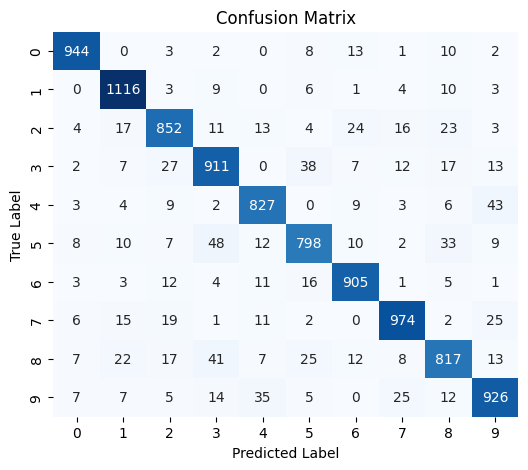

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    data=softmax_reg_conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Display TPR and TNR

In [ ]:
pd.DataFrame({
    "True-Positive Rate (TPR)": [f"{(rate * 100):.2f}%" for rate in softmax_reg_tpr],
    "True-Negative Rate (TNR)": [f"{(rate * 100):.2f}%" for rate in softmax_reg_tnr]
})

,True-Positive Rate (TPR),True-Negative Rate (TNR)
0,96.03%,95.93%
1,96.88%,92.92%
2,88.11%,89.31%
3,88.10%,87.34%
4,91.28%,90.28%
5,85.17%,88.47%
6,94.17%,92.25%
7,92.32%,93.12%
8,84.31%,87.38%
9,89.38%,89.21%


Display summarized confusion matrix as a heatmap

In [ ]:
softmax_reg_summarized_conf_matrix = summarize_confusion_matrix(softmax_reg_conf_matrix)
softmax_reg_summarized_conf_matrix

,Actual Positive,Actual Negative
Predicted Positive,TP: 9070,FP: 930
Predicted Negative,FN: 930,TN: 89070


## Part C: Linear Regression

In this part, we'll apply linear regression using the least squares method to classify handwritten digits from the MNIST dataset.

#### Formulate digit classification as a regression problem.

Given:
- **X**: A real input matrix with m examples (images) and n features (pixels).
- **y**: A real vector with m labels, where each label is a digit between 0 and 9 (inclusive).

We aim to learn a linear function **f(X)** that maps the input features to continuous outputs:

**f(X) = XW + b**

Where:
- **W**: A real weight matrix of shape (n x 10).
- **b**: A real bias vector of shape (10).

For each input image (a row in **X**), we calculate the predicted output, which will be a 10-dimensional vector (corresponding to the 10 digits, 0 to 9). The predicted label will correspond to the class with the highest value in this vector.

#### Define Linear Regression classifier model

In [ ]:
class LinearRegressionClassifier:
    """
    Linear Regression classifier model that use the least squares method for multi-class classification.
    """
    def __init__(self, n_features: int, n_classes: int) -> None:
        """
        Initialize a Linear Regression model.

        Args:
            n_features (int): Number of features in the input data.
            n_classes (int): Number of classes in the classification task.
        """
        self.weights = np.zeros((n_classes, n_features))

    def fit(self, training_examples: np.ndarray, training_labels: np.ndarray) -> None:
        """
        Train the Linear Regression model using the least squares method.

        Args:
            training_examples (np.ndarray): Training feature matrix of shape (num_samples, num_features).
            training_labels (np.ndarray): One-hot encoded training labels of shape (num_samples, num_classes).
        """
        training_examples = training_examples.to_numpy() if isinstance(training_examples, pd.DataFrame) else training_examples
        training_labels = training_labels.to_numpy() if isinstance(training_labels, pd.DataFrame) else training_labels

        # Compute the pseudo-inverse solution as W = (X^T X)^(-1) X^T Y
        self.weights = np.linalg.pinv(training_examples) @ training_labels

    def predict(self, examples: np.ndarray) -> np.ndarray:
        """
        Predict class labels for given input examples.

        Args:
            examples (np.ndarray): Input examples to classify (shape: [n_samples x n_features]).

        Returns:
            np.ndarray: Predicted label for each input example (shape: [n_samples]).
        """
        examples = examples.to_numpy() if isinstance(examples, pd.DataFrame) else examples
        return np.argmax(examples @ self.weights, axis=1)

- Note that this model has no hyperparameters to tune.

#### Train model

In [ ]:
linear_regression_model = LinearRegressionClassifier(n_features=X_train.shape[1], n_classes=n_classes)
linear_regression_model.fit(X_train, y_train)

#### Test model

In [ ]:
y_pred = linear_regression_model.predict(X_test)

#### Evaluate performance

Calculate accuracy, confusion matrix, TPR and TNR

In [ ]:
linear_reg_accuracy = accuracy_score(y_test, y_pred)
linear_reg_conf_matrix = confusion_matrix(y_test, y_pred)
linear_reg_tpr, linear_reg_tnr = calculate_tpr_tnr(linear_reg_conf_matrix)

Print accuracy

In [ ]:
print(f"Accuracy: {(linear_reg_accuracy * 100):.2f}%")

Accuracy: 85.13%


Display TPR and TNR

In [ ]:
pd.DataFrame({
    "True-Positive Rate (TPR)": [f"{(rate * 100):.2f}%" for rate in linear_reg_tpr],
    "True-Negative Rate (TNR)": [f"{(rate * 100):.2f}%" for rate in linear_reg_tnr]
})

,True-Positive Rate (TPR),True-Negative Rate (TNR)
0,95.12%,90.51%
1,97.31%,80.65%
2,80.66%,89.55%
3,83.66%,81.84%
4,87.97%,80.10%
5,72.79%,87.44%
6,91.99%,88.67%
7,85.97%,87.63%
8,72.24%,84.34%
9,81.27%,83.20%


Display confusion matrix as a heatmap

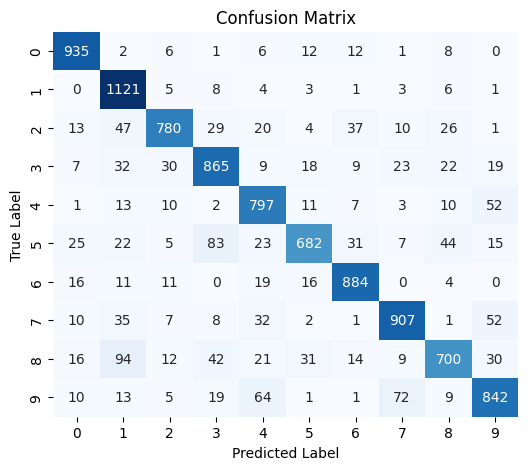

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    data=linear_reg_conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=np.unique(y_test),
    yticklabels=np.unique(y_test)
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Display summarized confusion matrix as a heatmap

In [ ]:
linear_reg_summarized_conf_matrix = summarize_confusion_matrix(linear_reg_conf_matrix)
linear_reg_summarized_conf_matrix

,Actual Positive,Actual Negative
Predicted Positive,TP: 8513,FP: 1487
Predicted Negative,FN: 1487,TN: 88513


## Model Comparison

#### Create a DataFrame for Metrics

In [ ]:
comparison_table = pd.DataFrame({
    "Model": ["Perceptron", "Softmax Regression", "Linear Regression"],
    "Accuracy": [perceptron_accuracy, softmax_reg_accuracy, linear_reg_accuracy],
    "Average TPR": [perceptron_tpr.mean(), softmax_reg_tpr.mean(), linear_reg_tpr.mean()],
    "Average TNR": [perceptron_tnr.mean(), softmax_reg_tnr.mean(), linear_reg_tnr.mean()],
})
comparison_table

,Model,Accuracy,Average TPR,Average TNR
0,Perceptron,0.8352,0.833498,0.848261
1,Softmax Regression,0.9070,0.905756,0.906223
2,Linear Regression,0.8513,0.848971,0.853922


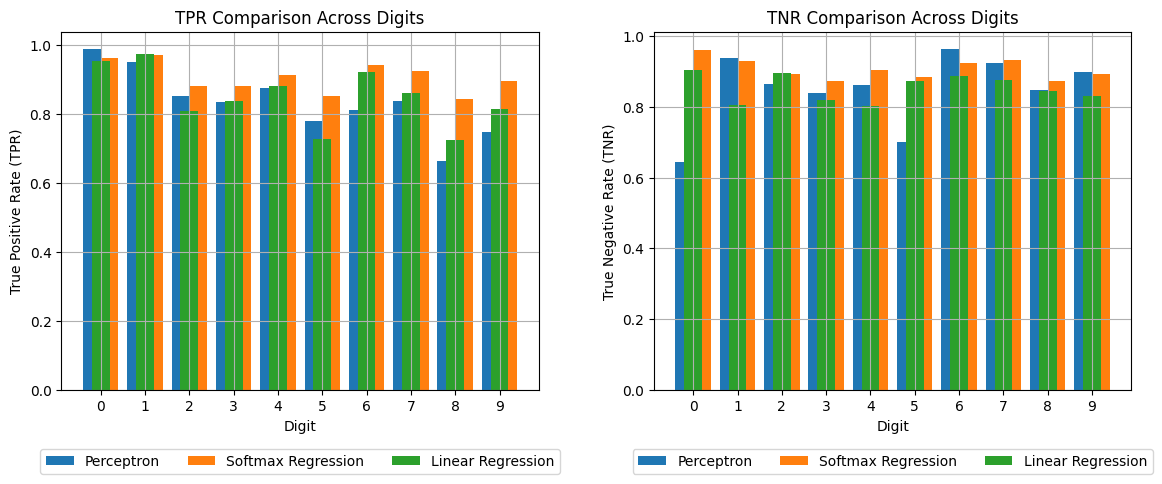

In [ ]:
digits = np.arange(10)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# TPR Bar Plot
ax[0].bar(digits - 0.2, perceptron_tpr, width=0.4, label='Perceptron', align='center')
ax[0].bar(digits + 0.2, softmax_reg_tpr, width=0.4, label='Softmax Regression', align='center')
ax[0].bar(digits, linear_reg_tpr, width=0.4, label='Linear Regression', align='center')
ax[0].set_xticks(digits)
ax[0].set_xlabel("Digit")
ax[0].set_ylabel("True Positive Rate (TPR)")
ax[0].set_title("TPR Comparison Across Digits")
ax[0].legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax[0].grid(True)

# TNR Bar Plot
ax[1].bar(digits - 0.2, perceptron_tnr, width=0.4, label='Perceptron', align='center')
ax[1].bar(digits + 0.2, softmax_reg_tnr, width=0.4, label='Softmax Regression', align='center')
ax[1].bar(digits, linear_reg_tnr, width=0.4, label='Linear Regression', align='center')
ax[1].set_xticks(digits)
ax[1].set_xlabel("Digit")
ax[1].set_ylabel("True Negative Rate (TNR)")
ax[1].set_title("TNR Comparison Across Digits")
ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)
ax[1].grid(True)

plt.tight_layout()
plt.show()